<a href="https://colab.research.google.com/github/vedasam-ch15/stroke_prediction/blob/main/prml_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Preprocessing steps

In [ ]:
import torch #python #keras #tensorflow #pytorch
import torch.nn as nn
from torch.autograd import Variable
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as mp
import sklearn
from sklearn.preprocessing  import LabelEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.compose import ColumnTransformer
from pandas.core.internals.managers import T

In [ ]:
d=pd.read_csv('/content/drive/MyDrive/Pattern Recognition and Machine Learning - 2022 Winter Semester/labs/prml project/healthcare-dataset-stroke-data (1).csv')
d.shape

(5110, 12)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#d=pd.read_csv('/content/drive/MyDrive/Pattern Recognition and Machine Learning - 2022 Winter Semester/labs/prml project/healthcare-dataset-stroke-data (1).csv')
#d.shape

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
d.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
d['Residence_type'].unique()

array(['Urban', 'Rural'], dtype=object)

In [ ]:
d.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
d.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [ ]:
d['bmi']=d['bmi'].fillna(d['bmi'].mean())
d.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [ ]:
d['stroke'].unique()

array([1, 0])

In [ ]:
d.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [ ]:
d["Residence_type"].value_counts()


Urban    2596
Rural    2514
Name: Residence_type, dtype: int64

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
d['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [ ]:
d.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

###Here i removed "id" column

In [ ]:
g=d.copy()
g.drop(["id"],axis=1,inplace=True)

##### Here in gender '1'- male, '0' -female

In [ ]:
g.head()
#g.columns


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [ ]:
g.shape

(5110, 11)

#**EDA**

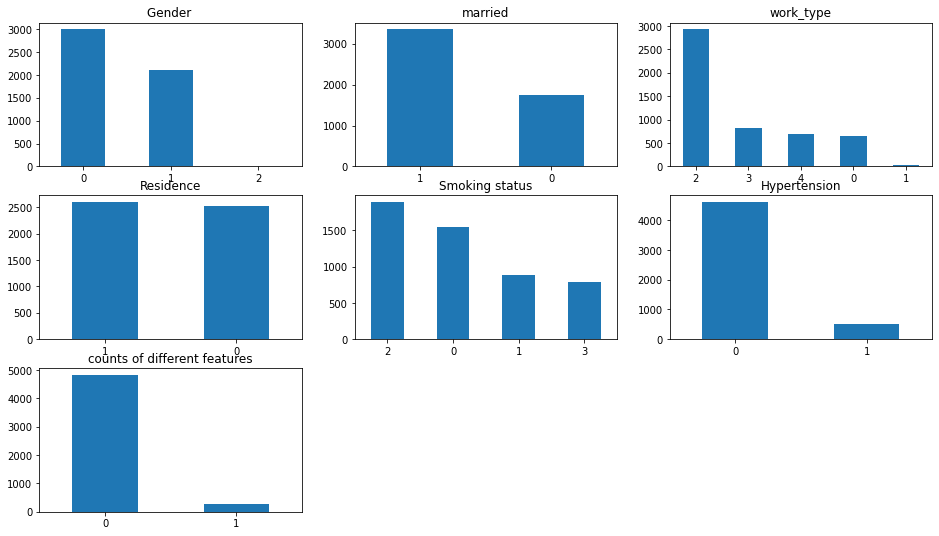

In [ ]:
plt.subplot(331)

g['gender'].value_counts().plot(kind='bar', title='Gender ', figsize=(16,9))
plt.xticks(rotation=0)

plt.subplot(332)

g['ever_married'].value_counts().plot(kind='bar', title='married')

plt.xticks(rotation=0)

plt.subplot(333)

g['work_type'].value_counts().plot(kind='bar', title='work_type')

plt.xticks(rotation=0)

plt.subplot(334)

g['Residence_type'].value_counts().plot(kind='bar', title='Residence')

plt.xticks(rotation=0)


plt.subplot(335)

g['smoking_status'].value_counts().plot(kind='bar', title='Smoking status')

plt.xticks(rotation=0)


plt.subplot(336)

g['hypertension'].value_counts().plot(kind='bar', title='Hypertension')

plt.xticks(rotation=0)

plt.subplot(337)

g['heart_disease'].value_counts().plot(kind='bar', title='Heart disease')

plt.xticks(rotation=0)


plt.show()

Text(0.5, 1.0, 'age')

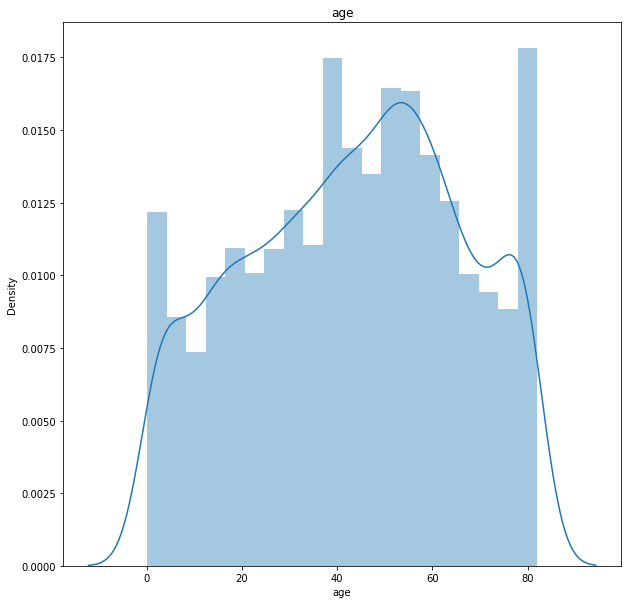

In [ ]:
sns.distplot(g['age'])
plt.title('age')

Text(0.5, 1.0, 'avg_glucose_level')

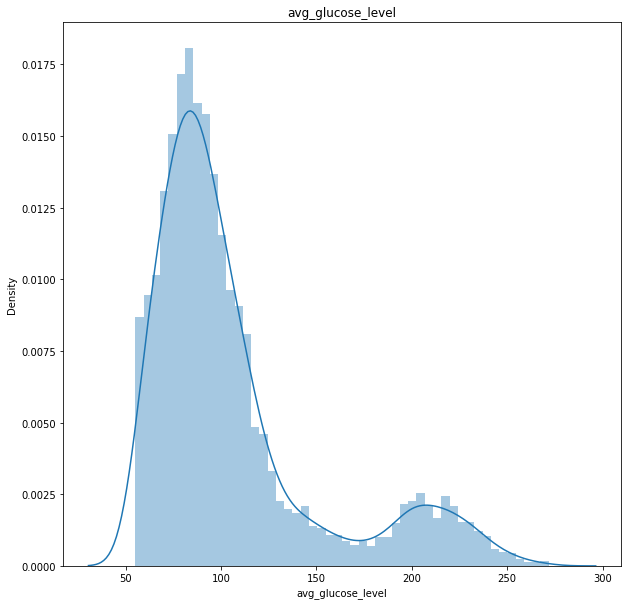

In [ ]:
sns.distplot(g['avg_glucose_level'])
plt.title('avg_glucose_level')

Text(0.5, 1.0, 'bmi')

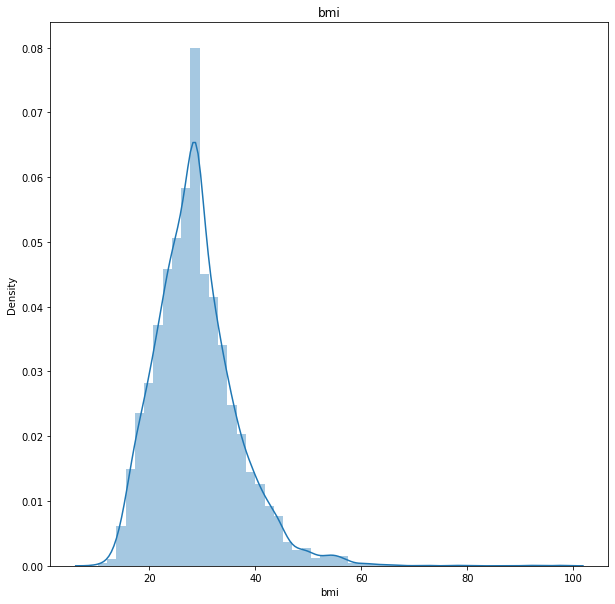

In [ ]:
sns.distplot(g['bmi'])
plt.title('bmi')

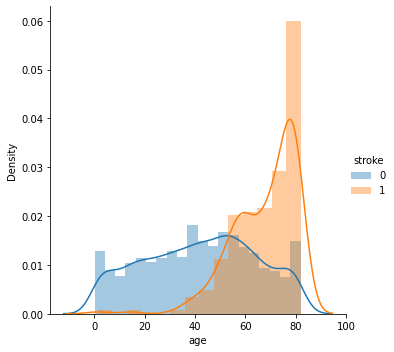

In [ ]:
j=sns.FacetGrid(g, hue="stroke", height=5)
j.map(sns.distplot, "age")
j.add_legend()
plt.show()

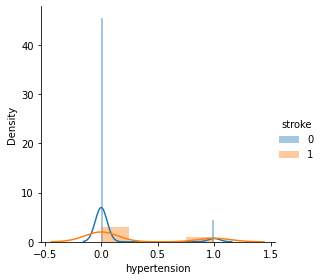

In [ ]:
j=sns.FacetGrid(g, hue="stroke", height=4)
j.map(sns.distplot, "hypertension")
# map the above form facetgrid with some attributes
j.add_legend()
plt.show()

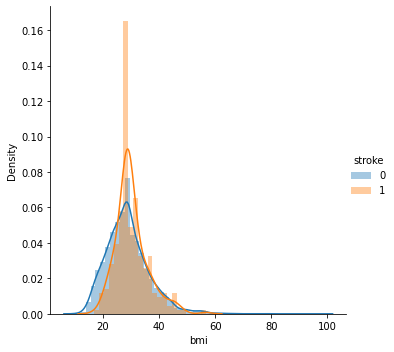

In [ ]:
j=sns.FacetGrid(g, hue="stroke", height=5)
j.map(sns.distplot, "bmi")
j.add_legend()
plt.show()

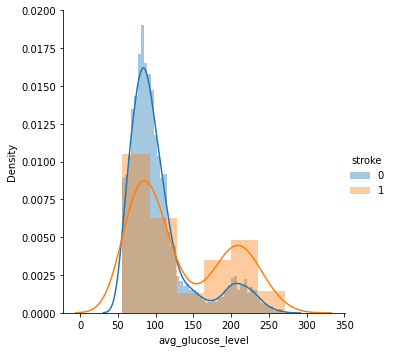

In [ ]:
j=sns.FacetGrid(g, hue="stroke", height=5)
j.map(sns.distplot, "avg_glucose_level")
j.add_legend()
plt.show()

comparision of bmi with smoking status, heart disease, ever married

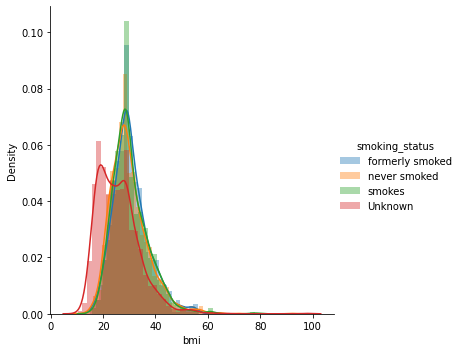

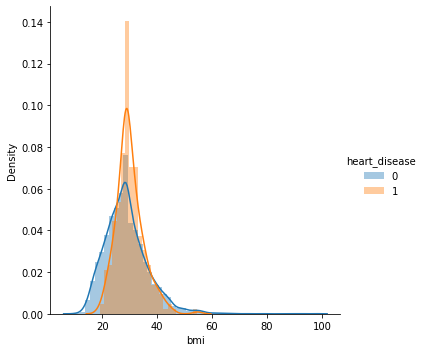

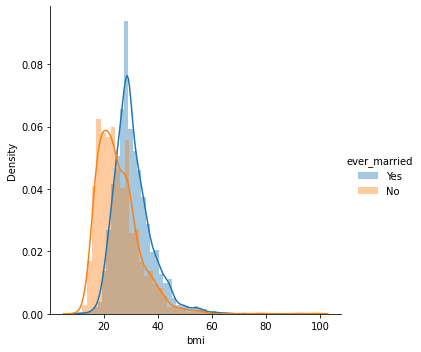

In [ ]:
j=sns.FacetGrid(g, hue="smoking_status", height=5)
j.map(sns.distplot, "bmi")
j.add_legend()
plt.show()

j=sns.FacetGrid(g, hue="heart_disease", height=5)
j.map(sns.distplot, "bmi")
j.add_legend()
plt.show()

j=sns.FacetGrid(g, hue="ever_married", height=5)
j.map(sns.distplot, "bmi")
j.add_legend()
plt.show()

comparision of avg_glucose_level with smoking status, heart disease, ever married

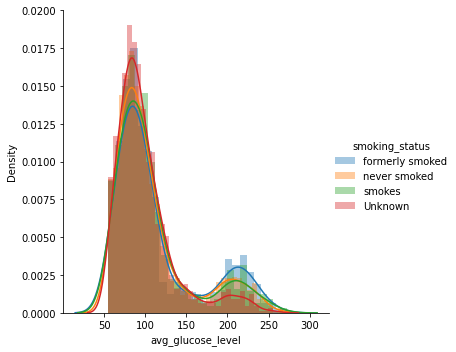

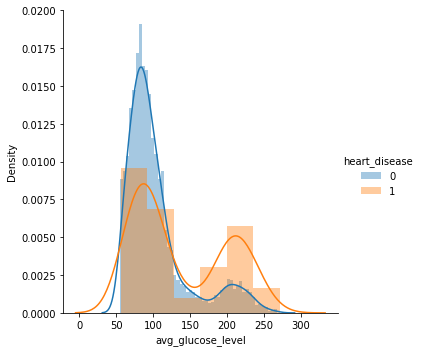

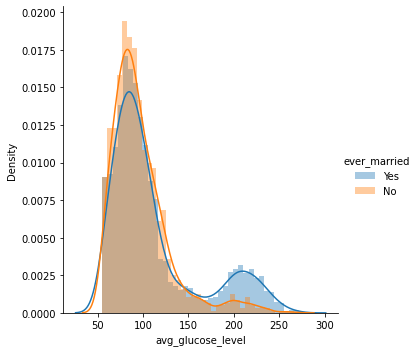

In [ ]:
j=sns.FacetGrid(g, hue="smoking_status", height=5)
j.map(sns.distplot, "avg_glucose_level")
j.add_legend()
plt.show()

j=sns.FacetGrid(g, hue="heart_disease", height=5)
j.map(sns.distplot, "avg_glucose_level")
j.add_legend()
plt.show()

j=sns.FacetGrid(g, hue="ever_married", height=5)
j.map(sns.distplot, "avg_glucose_level")
j.add_legend()
plt.show()

comparision of age with smoking status, heart disease, ever married

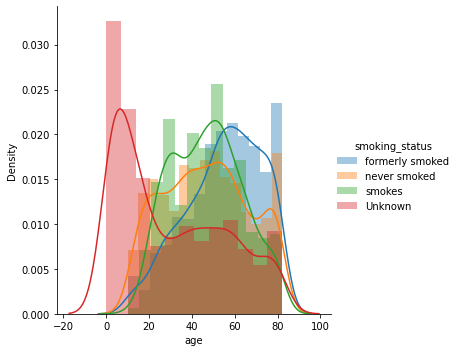

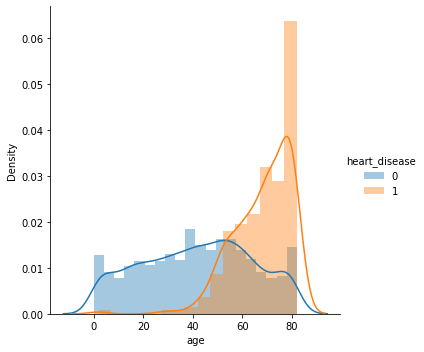

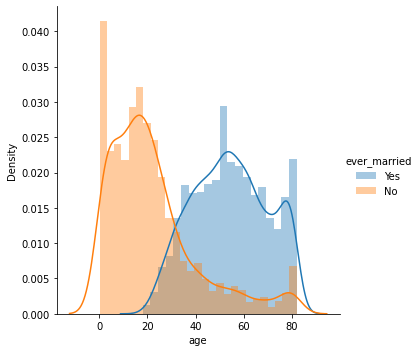

In [ ]:
j=sns.FacetGrid(g, hue="smoking_status", height=5)
j.map(sns.distplot, "age")
j.add_legend()
plt.show()

j=sns.FacetGrid(g, hue="heart_disease", height=5)
j.map(sns.distplot, "age")
j.add_legend()
plt.show()

j=sns.FacetGrid(g, hue="ever_married", height=5)
j.map(sns.distplot, "age")
j.add_legend()
plt.show()

###Boxplot

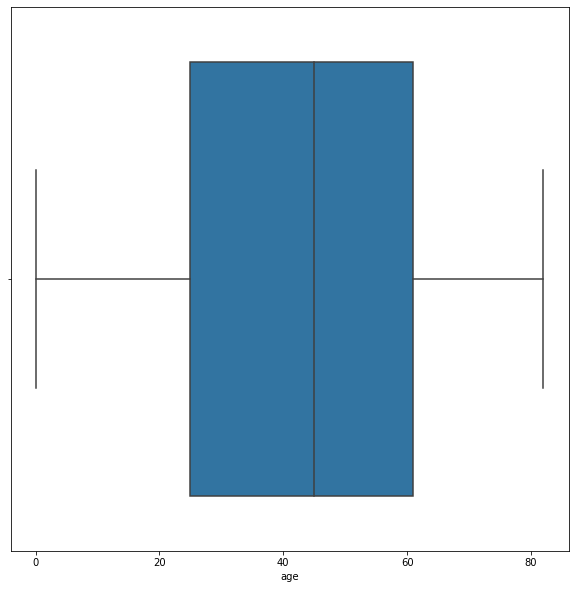

In [ ]:
#Boxplot to see how the categorical feature "stroke" is distributed with all other four input variables
sns.boxplot(x=g['age'])


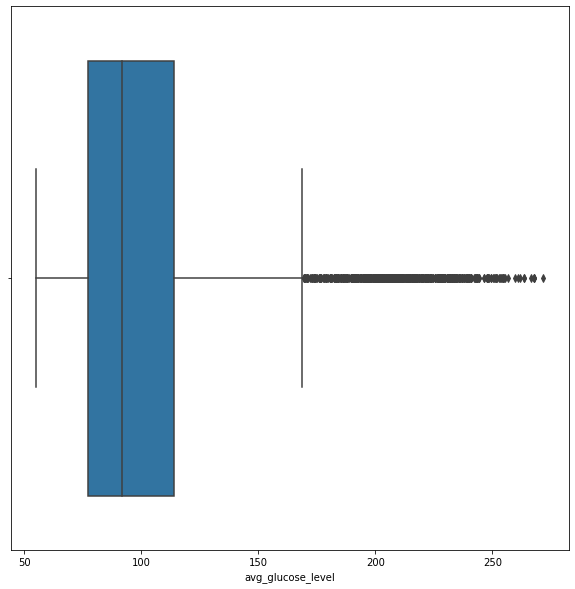

In [ ]:
sns.boxplot(x=g['avg_glucose_level'])

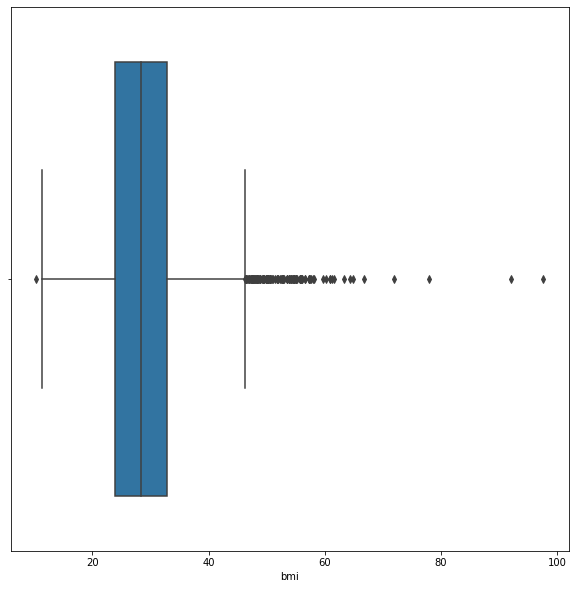

In [ ]:
sns.boxplot(x=g['bmi'])

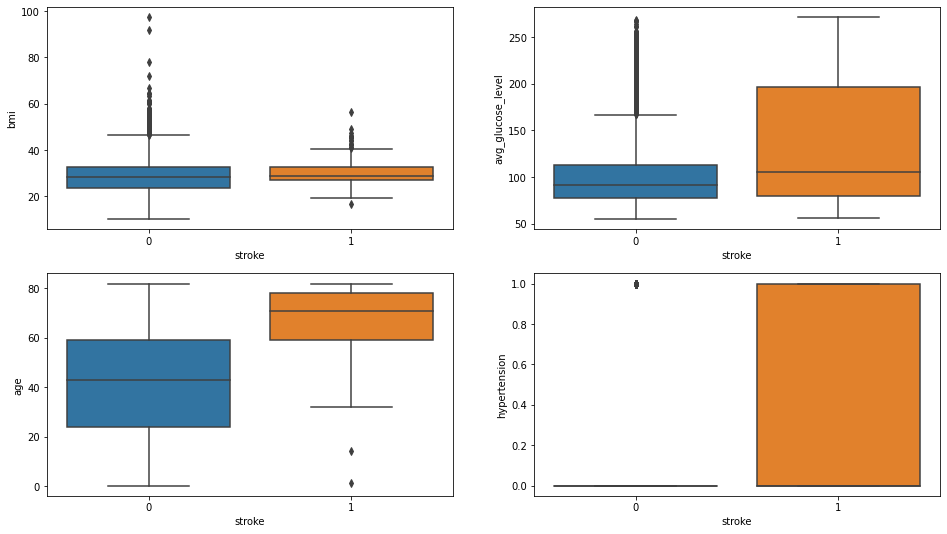

In [ ]:
fig, axes = plt.subplots(2,2, figsize=(16,9))
sns.boxplot( y="bmi", x= "stroke", data=g, orient='v' , ax=axes[0,0])
sns.boxplot( y="avg_glucose_level", x= "stroke", data=g, orient='v' , ax=axes[0, 1])
sns.boxplot( y="age", x= "stroke", data=g, orient='v' , ax=axes[1, 0])
sns.boxplot( y="hypertension", x= "stroke", data=g, orient='v' , ax=axes[1, 1])
plt.show()

Heatmap

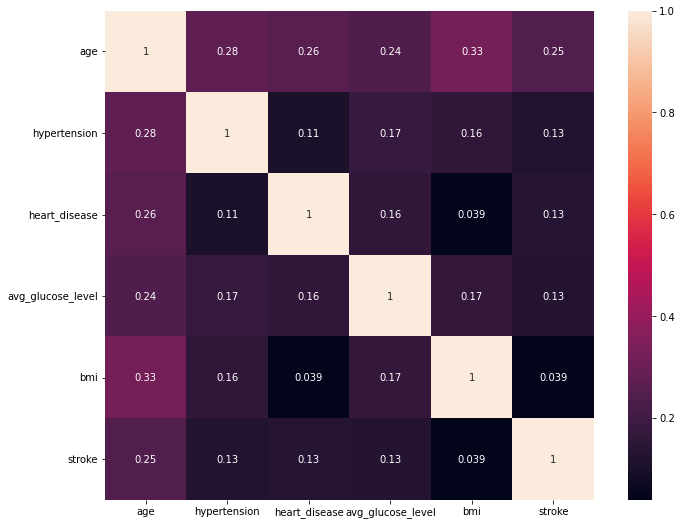

In [ ]:
corr = g.corr()
import matplotlib.pyplot as plot
plt.figure(figsize=(12,9))
sns.heatmap(corr, annot=True, square=True)
plt.yticks(rotation=0)
plt.show()

In [ ]:
cat_cols = ['gender','ever_married','work_type','Residence_type','smoking_status']

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder 
for i in cat_cols:
   l=LabelEncoder()
   g[i]=l.fit_transform(g[i])
   #encoder = OneHotEncoder(sparse=False, handle_unknown='ignore').fit(d[i])
   #encoded_cols = list(encoder.get_feature_names(i))
   #d[i] = encoder.transform(d[i])
g.head()


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,0,79.0,1,0,1,3,0,174.12,24.000000,2,1


In [ ]:
f= d.drop(['id'], axis = 1)

In [ ]:
f.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


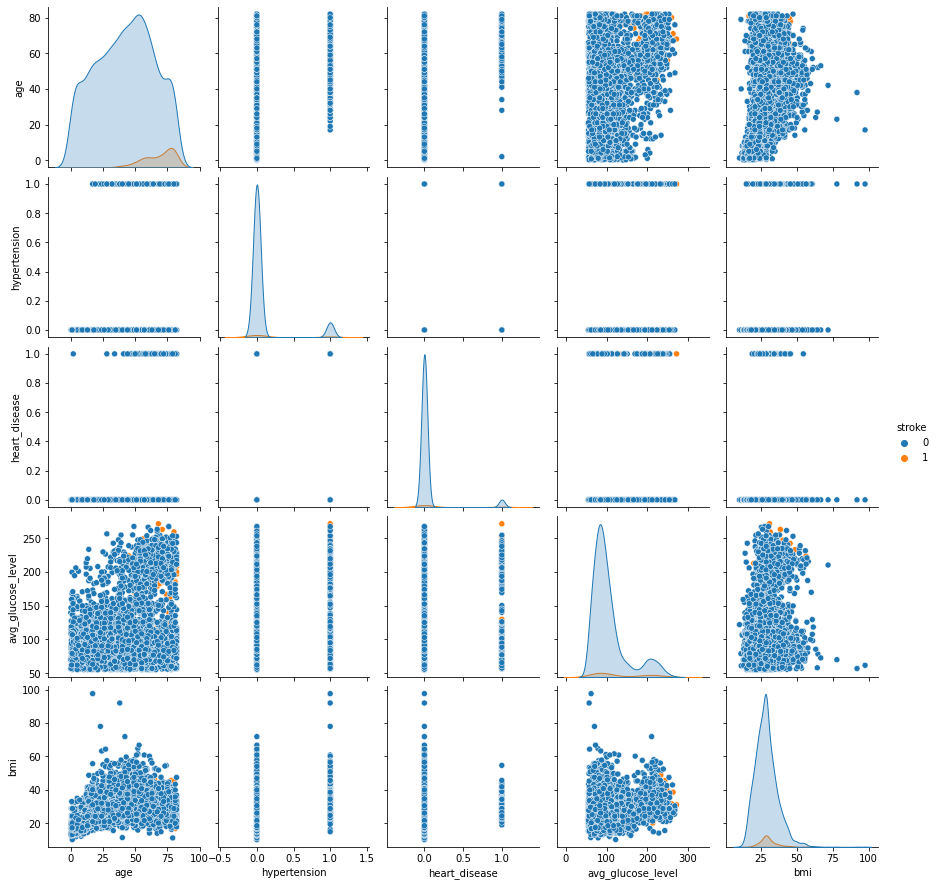

In [ ]:
sns.pairplot(f, hue = 'stroke')

### Splitting of dataset into train and test data

In [ ]:
g.shape
g.columns[10]

'stroke'

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
#k=g.copy()
#k.drop(["stroke"],axis=1,inplace=True)
from imblearn.over_sampling import SMOTE
x=g.iloc[:,:-1]
y=g.iloc[:,-1]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3, random_state = 2002)
sc = StandardScaler()
x_train = sc.fit_transform(x_train, y_train)
x_test = sc.fit_transform(x_test, y_test)
smote = SMOTE()
x_train, y_train = smote.fit_resample(x_train, y_train)
x_test, y_test = smote.fit_resample(x_test, y_test)


print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(6810, 10)
(2912, 10)
(6810,)
(2912,)


In [ ]:
y
x.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status'],
      dtype='object')

Importing modules

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import plot_roc_curve, plot_confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score as ac
from sklearn.metrics import precision_score as ps
from sklearn.metrics import recall_score as rs

# **FEATURE SELECTION**

[0.03259218 0.25355537 0.02192639 0.02150276 0.01754147 0.05993117
 0.03587645 0.25289406 0.22061527 0.08356487]


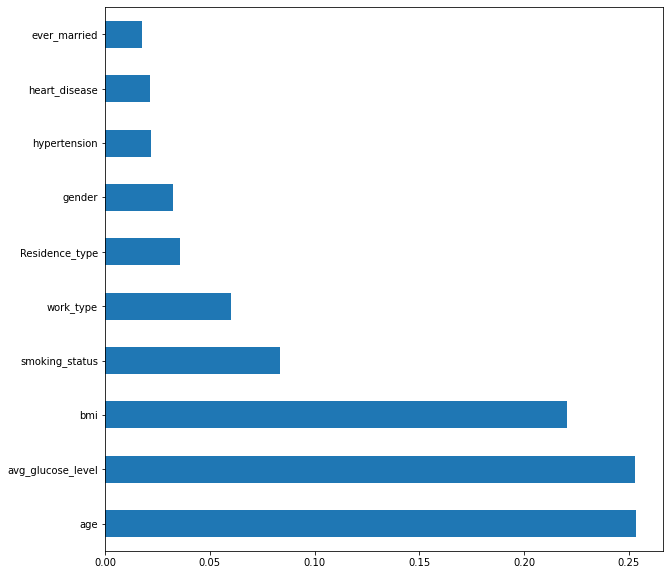

In [ ]:
import pandas as pd
import numpy as np
data =g.copy()
#X = data.iloc[:,0:20]  #independent columns
#y = data.iloc[:,-1]    #target column i.e price range
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(x,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=x.column)
feat_importances.nlargest(12).plot(kind='barh')
plt.show()

# **1)Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
#X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
l1 = LogisticRegression(random_state = 2002)
l1.fit(x_train, y_train)

LogisticRegression(random_state=2002)

In [ ]:
y_pred1 = l1.predict(x_test)
print(l1.score(x_test, y_test))

0.8094093406593407


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred1)
print(confusion_matrix)

[[1087  369]
 [ 186 1270]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.85      0.75      0.80      1456
           1       0.77      0.87      0.82      1456

    accuracy                           0.81      2912
   macro avg       0.81      0.81      0.81      2912
weighted avg       0.81      0.81      0.81      2912



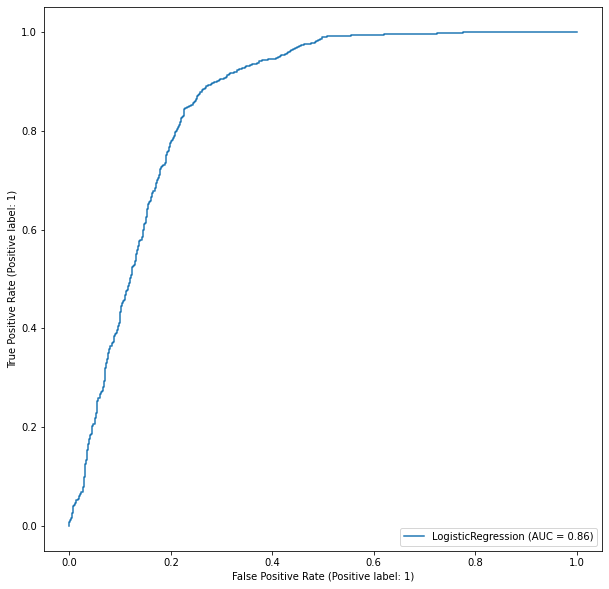

In [ ]:
plot_roc_curve(l1, x_test, y_test)

#**2)Random Forest Classifier**

In [ ]:

r = RandomForestClassifier(n_jobs=-1, random_state=2002)
r.fit(x_train, y_train)
r.score(x_train, y_train)

1.0

In [ ]:
r.score(x_test,y_test)

0.8056318681318682

In [ ]:
r.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 2002,
 'verbose': 0,
 'warm_start': False}

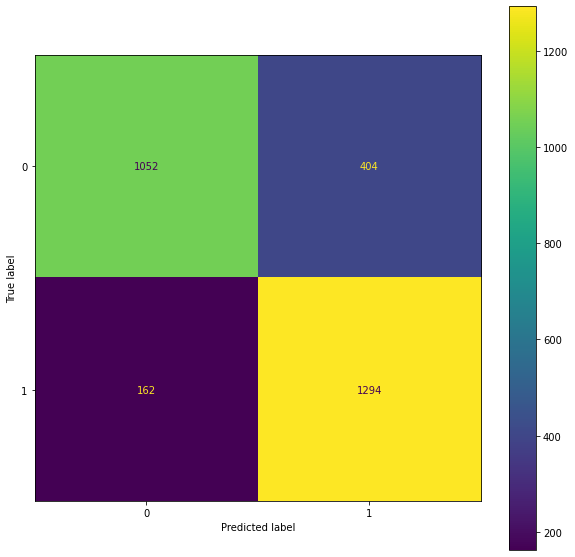

In [ ]:

plot_confusion_matrix(r,x_test,y_test)

In [ ]:
# Classification Report

y_pred2 = r.predict(x_test)
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.87      0.72      0.79      1456
           1       0.76      0.89      0.82      1456

    accuracy                           0.81      2912
   macro avg       0.81      0.81      0.80      2912
weighted avg       0.81      0.81      0.80      2912



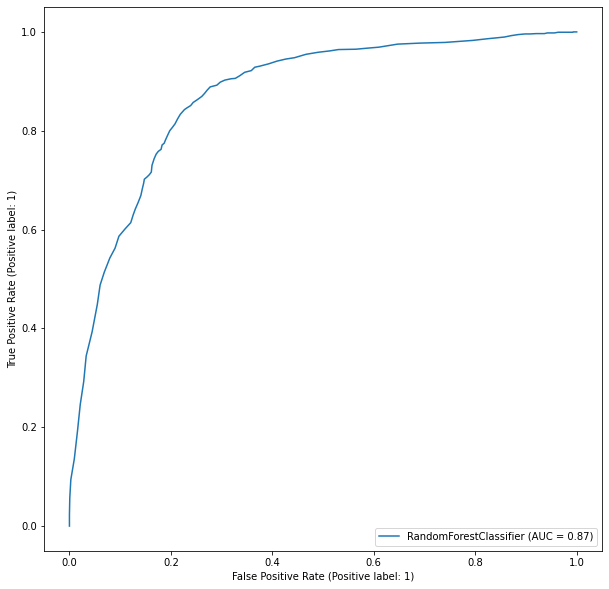

In [ ]:
plot_roc_curve(r,x_test,y_test)

In [ ]:
# 4. Cross Validated Score
from sklearn.model_selection import cross_val_score
score_RFC = cross_val_score(r,x_test,y_test)
score_RFC.T

array([0.91766724, 0.97084048, 0.96907216, 0.96907216, 0.97594502])

# **3)DECISION TREE CLASSIFIER**

In [ ]:
clf = DecisionTreeClassifier(random_state = 2022)
clf.fit(x_train, y_train)
y_pred3 = clf.predict(x_test)
accuracy_score(y_test, y_pred3)

0.7788461538461539

In [ ]:
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.85      0.68      0.75      1456
           1       0.73      0.88      0.80      1456

    accuracy                           0.78      2912
   macro avg       0.79      0.78      0.78      2912
weighted avg       0.79      0.78      0.78      2912



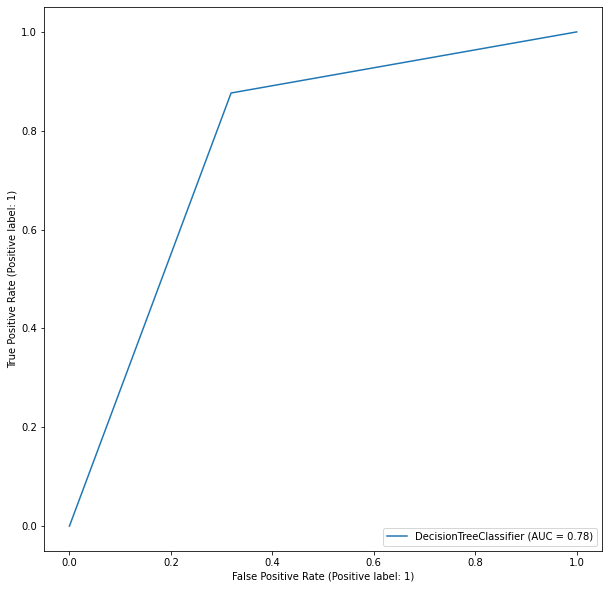

In [ ]:
plot_roc_curve(clf, x_test, y_test)

##**4)SVM**

###Using Linear Kernel

In [ ]:
# Fitting SVC Classification to the Training set with linear kernel
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
#r=[1,2,5,0.25,0.5,0.9,9,30]
#for i in r:
    
svc1 = SVC(kernel = 'linear', C=10, random_state = 2002)
svc1.fit(x_train, y_train)
# Predicting the Test set results
y_pred4 = svc1.predict(x_test)
# compute and print accuracy score
print('Model accuracy score with linear kernel and C=10, : {0:0.4f}'. format(accuracy_score(y_test, y_pred4)))
print(y_pred1)

Model accuracy score with linear kernel and C=10, : 0.8039
[1 0 1 ... 0 1 1]


In [ ]:
# Classification Report
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred4))

              precision    recall  f1-score   support

           0       0.85      0.73      0.79      1456
           1       0.77      0.88      0.82      1456

    accuracy                           0.80      2912
   macro avg       0.81      0.80      0.80      2912
weighted avg       0.81      0.80      0.80      2912



In [ ]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred4)
cm

array([[1067,  389],
       [ 182, 1274]])

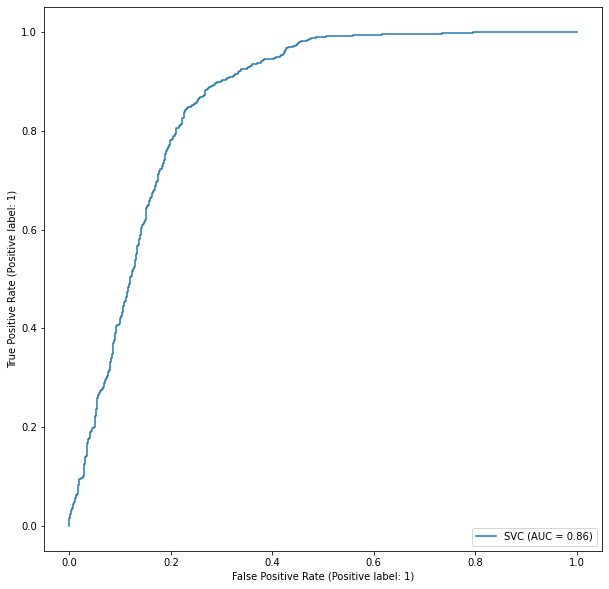

In [ ]:
# plot ROC Curve

plot_roc_curve(svc1, x_test, y_test)

# **5)KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
arr = [5, 7,10,13,15]
for n in arr:
  clf = KNeighborsClassifier(n_neighbors = n)
  clf.fit(x_train, y_train)
  y_pred5 = clf.predict(x_test)
  print("classification report for ",n,' neighbors is: ')
  print(classification_report(y_test, y_pred5))
  print("confusion matrix for ",n,' neighbors is: ')
  print(confusion_matrix(y_test, y_pred5))

classification report for  5  neighbors is: 
              precision    recall  f1-score   support

           0       0.60      0.85      0.70      1456
           1       0.74      0.44      0.55      1456

    accuracy                           0.64      2912
   macro avg       0.67      0.64      0.63      2912
weighted avg       0.67      0.64      0.63      2912

confusion matrix for  5  neighbors is: 
[[1235  221]
 [ 820  636]]
classification report for  7  neighbors is: 
              precision    recall  f1-score   support

           0       0.61      0.82      0.70      1456
           1       0.73      0.48      0.58      1456

    accuracy                           0.65      2912
   macro avg       0.67      0.65      0.64      2912
weighted avg       0.67      0.65      0.64      2912

confusion matrix for  7  neighbors is: 
[[1193  263]
 [ 761  695]]
classification report for  10  neighbors is: 
              precision    recall  f1-score   support

           0       0.

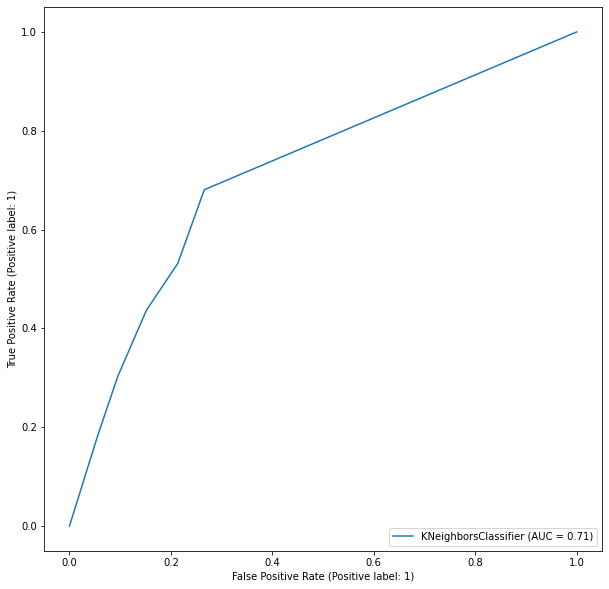

In [ ]:
clf = KNeighborsClassifier()
clf.fit(x_train, y_train)
y_pred5 = clf.predict(x_test)
plot_roc_curve(clf, x_test, y_test)

# **6) XGB**

              precision    recall  f1-score   support

           0       0.98      0.49      0.66      1456
           1       0.66      0.99      0.79      1456

    accuracy                           0.74      2912
   macro avg       0.82      0.74      0.72      2912
weighted avg       0.82      0.74      0.72      2912



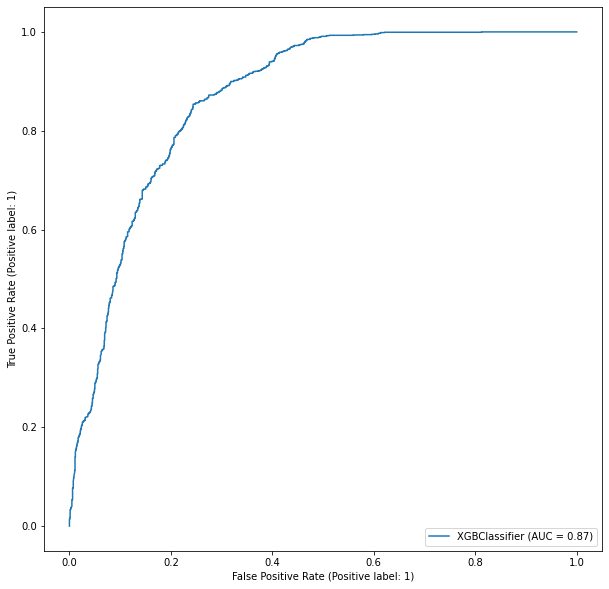

In [ ]:
import xgboost as xgb
import warnings
from xgboost import XGBClassifier
warnings.filterwarnings('ignore')
clf =XGBClassifier(max_depth=6,random_state = 2002)
clf.fit(x_train, y_train)
#plot_roc_curve(y_test, y_pred6)
y_pred6 = clf.predict(x_test)
plot_roc_curve(clf,x_test, y_test)
print(classification_report(y_test, y_pred6))

In [ ]:
acc=accuracy_score(y_test,y_pred6)
print("accuracy",acc)

accuracy 0.7421016483516484


# **7)Naive Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(x_train, y_train)
y_pred7 = clf.predict(x_test)
print(classification_report(y_test, y_pred7))

              precision    recall  f1-score   support

           0       0.85      0.73      0.78      1456
           1       0.76      0.87      0.81      1456

    accuracy                           0.80      2912
   macro avg       0.81      0.80      0.80      2912
weighted avg       0.81      0.80      0.80      2912



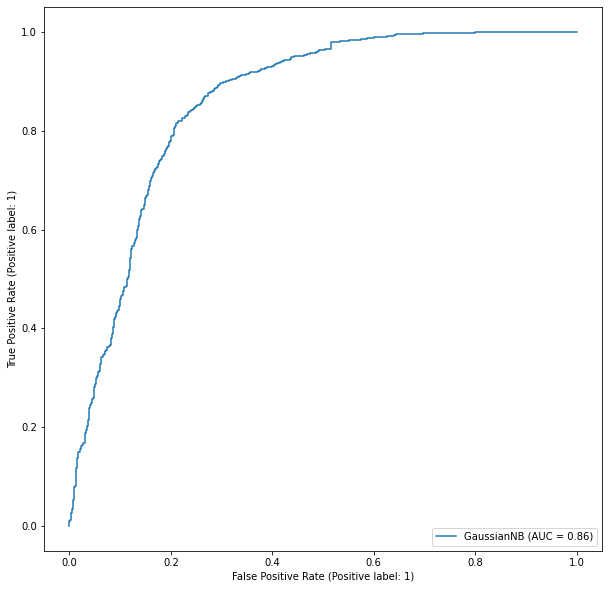

In [ ]:
plot_roc_curve(clf, x_test, y_test)

# **comparision of all models**

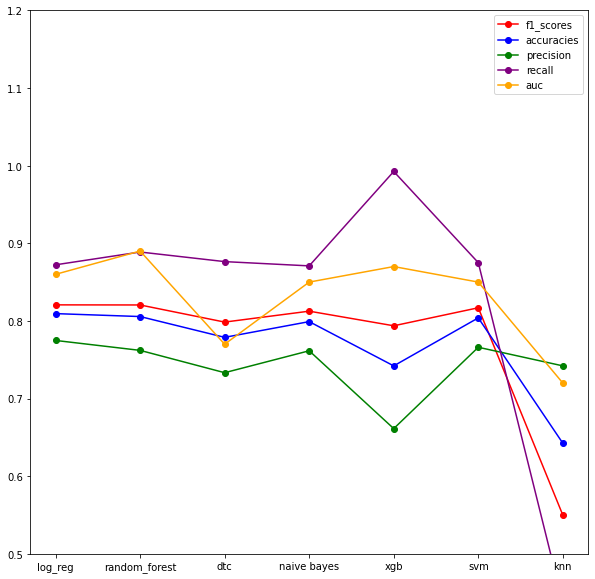

In [ ]:
x = ['log_reg','random_forest','dtc','naive bayes','xgb','svm','knn']
from sklearn.metrics import accuracy_score as ac
from sklearn.metrics import precision_score as ps
from sklearn.metrics import recall_score as rs

y1 = [f1_score(y_test, y_pred1),f1_score(y_test, y_pred2),f1_score(y_test, y_pred3),f1_score(y_test, y_pred7),f1_score(y_test, y_pred6),f1_score(y_test, y_pred4),f1_score(y_test, y_pred5)]
y2 = [ac(y_test, y_pred1),ac(y_test, y_pred2),ac(y_test, y_pred3),ac(y_test, y_pred7),ac(y_test, y_pred6),ac(y_test, y_pred4),ac(y_test, y_pred5)]
y3 = [ps(y_test, y_pred1),ps(y_test, y_pred2),ps(y_test, y_pred3),ps(y_test, y_pred7),ps(y_test, y_pred6),ps(y_test, y_pred4),ps(y_test, y_pred5)]
y4 = [rs(y_test, y_pred1),rs(y_test, y_pred2),rs(y_test, y_pred3),rs(y_test, y_pred7),rs(y_test, y_pred6),rs(y_test, y_pred4),rs(y_test, y_pred5)]
y5 = [0.86, 0.89,0.77,0.85,0.87,0.85,0.72]

plt.plot(x,y1,color = 'red', marker = 'o', label = 'f1_scores')
plt.plot(x, y2, color = 'blue', marker = 'o', label = 'accuracies')
plt.plot(x, y3, color = 'green', marker = 'o', label = 'precision')
plt.plot(x, y4, color = 'purple', marker = 'o', label = 'recall')
plt.plot(x, y5, color = 'orange', marker = 'o', label = 'auc')

plt.legend(loc = "best")
plt.ylim(0.5,1.2)

from matplotlib.pyplot import figure
plt.rcParams['figure.figsize'] = [10,10]

plt.show()

# **FINAL CHOSEN 4 MODELS: Random Forest Classifier, Decision Tree , Naive Bayes, and XGB**

**DECISION TREE WITH HYPERPARAMETER TUNING**

In [ ]:
para = {'max_depth':[4,5,6],'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4,6]}

In [ ]:
from sklearn.model_selection import GridSearchCV
g_clf = DecisionTreeClassifier(random_state = 2002)
g_clf = GridSearchCV(
    g_clf, para, verbose=1, cv=3, scoring='accuracy')

gr= g_clf.fit(x_train, y_train)
print('Best Params: ', gr.best_params_)
print('Best Score: ', gr.best_score_)


Fitting 3 folds for each of 1176 candidates, totalling 3528 fits
Best Params:  {'max_depth': 6, 'max_leaf_nodes': 30, 'min_samples_split': 2}
Best Score:  0.8279001468428783


In [ ]:
clf1 = DecisionTreeClassifier(random_state = 2002, max_depth = 6, max_leaf_nodes = 30, min_samples_split = 2)
clf1.fit(x_train, y_train)
y_pred1 = clf1.predict(x_test)
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.86      0.67      0.75      1456
           1       0.73      0.89      0.80      1456

    accuracy                           0.78      2912
   macro avg       0.80      0.78      0.78      2912
weighted avg       0.80      0.78      0.78      2912



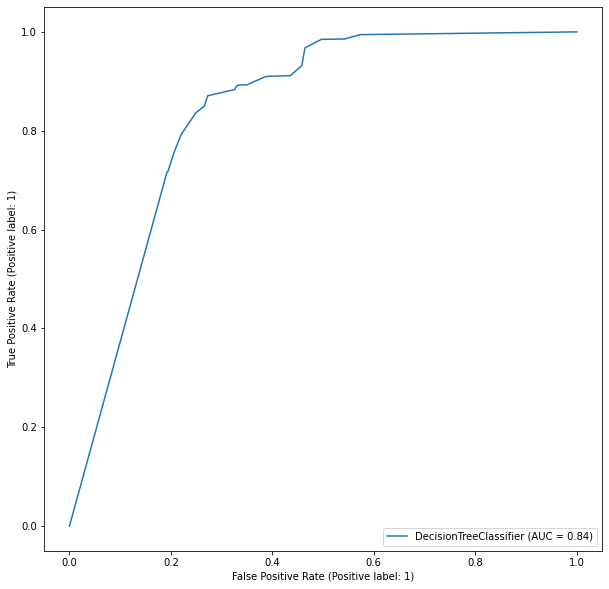

In [ ]:
plot_roc_curve(clf1, x_test, y_test)

**RANDOM FOREST WITH HYPERPARAMETER TUNING**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
clf2 = RandomForestClassifier(random_state = 2002)
random_grid = {'bootstrap': [True, False],
               'max_depth': [3,5,8,10,12, None],
               'max_features': ['auto', 'sqrt'],
               'min_samples_leaf': [1, 2, 4],
               'min_samples_split': [2, 5, 10],
               'n_estimators': [100, 200, 500, 750]}
RSC = RandomizedSearchCV(clf,random_grid,n_jobs=-1)
RSC.fit(x_train,y_train)
RSC.best_params_


{'bootstrap': True,
 'max_depth': None,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 500}

In [ ]:
clf2 = RandomForestClassifier(random_state = 2002, bootstrap = True, max_depth = None, max_features = 'auto',min_samples_leaf = 1, min_samples_split = 2, n_estimators = 500)
clf2.fit(x_train, y_train)
y_pred2 = clf2.predict(x_test)
print(classification_report(y_test, y_pred2))
 

              precision    recall  f1-score   support

           0       0.88      0.71      0.78      1456
           1       0.76      0.90      0.82      1456

    accuracy                           0.80      2912
   macro avg       0.82      0.80      0.80      2912
weighted avg       0.82      0.80      0.80      2912



In [ ]:
rs(y_test, y_pred2)

0.9004120879120879

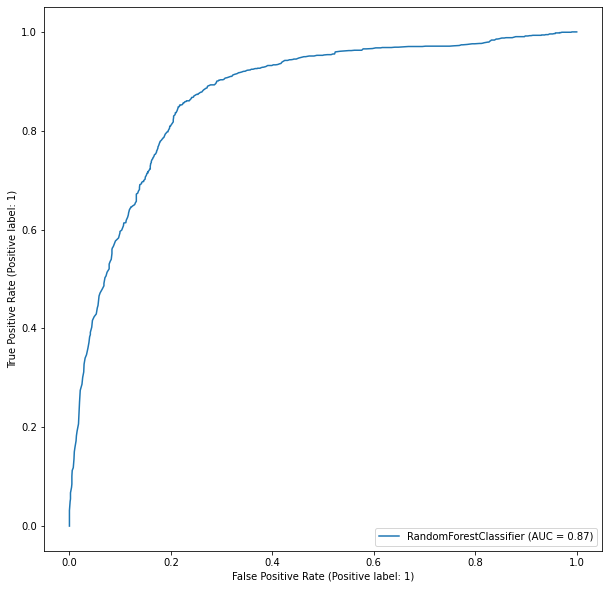

In [ ]:
plot_roc_curve(clf2, x_test, y_test)

**NAIVE BAYES WITH HYPERPARAMETER TUNING**

In [ ]:
from sklearn.naive_bayes import GaussianNB
clf3 = GaussianNB()
clf3.fit(x_train, y_train)
y_pred3 = clf3.predict(x_test)
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.85      0.73      0.78      1456
           1       0.76      0.87      0.81      1456

    accuracy                           0.80      2912
   macro avg       0.81      0.80      0.80      2912
weighted avg       0.81      0.80      0.80      2912



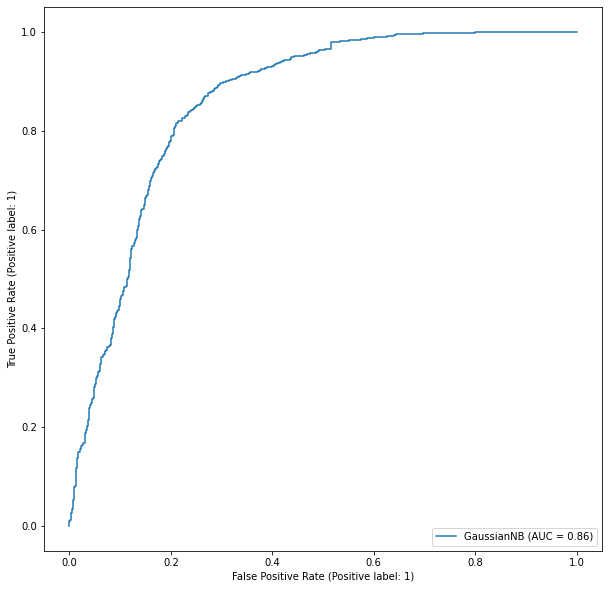

In [ ]:
plot_roc_curve(clf3, x_test, y_test)

**XGBoost WITH HYPERPARAMETER TUNING**

In [ ]:
import xgboost as xgb
import warnings
from xgboost import XGBClassifier
warnings.filterwarnings('ignore')
clf =XGBClassifier()
param_grid = {
    "n_estimators":[500,1000,1500,2000],
    "max_depth":[4,5,6,7],
    'bootstrap':[True,False],
    "learning_rate":[0.05,0.01,0.1]
}


In [ ]:
RSC = RandomizedSearchCV(clf,param_grid,n_jobs=-1)
RSC.fit(x_train,y_train)

RandomizedSearchCV(estimator=XGBClassifier(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'learning_rate': [0.05, 0.01, 0.1],
                                        'max_depth': [4, 5, 6, 7],
                                        'n_estimators': [500, 1000, 1500,
                                                         2000]})

In [ ]:
RSC.best_params_

{'bootstrap': False,
 'learning_rate': 0.05,
 'max_depth': 7,
 'n_estimators': 1000}

In [ ]:
xg = XGBClassifier(n_estimators=1000,max_depth=7,learning_rate=0.05,bootstrap=False,random_state = 2002)

In [ ]:
xg.fit(x_train,y_train)

XGBClassifier(bootstrap=False, learning_rate=0.05, max_depth=6,
              n_estimators=1500, random_state=2002)

              precision    recall  f1-score   support

           0       0.99      0.42      0.59      1456
           1       0.63      1.00      0.78      1456

    accuracy                           0.71      2912
   macro avg       0.81      0.71      0.68      2912
weighted avg       0.81      0.71      0.68      2912



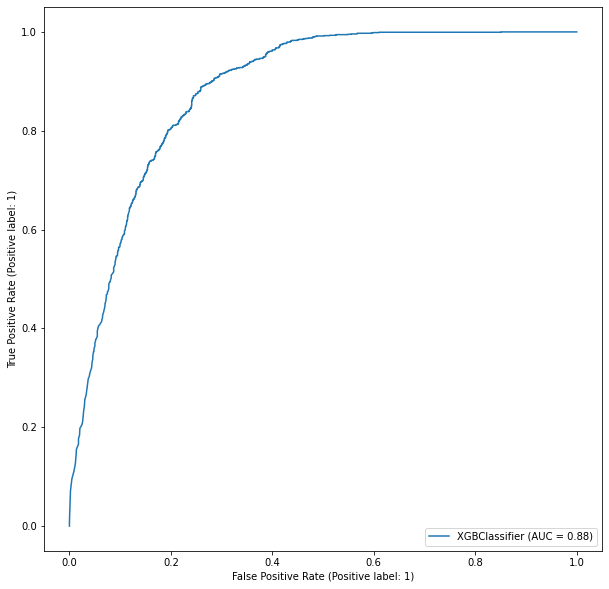

In [ ]:
y_pred4 = xg.predict(x_test)
plot_roc_curve(xg,x_test, y_test)
print(classification_report(y_test, y_pred4))

**Comparision graph of all models**

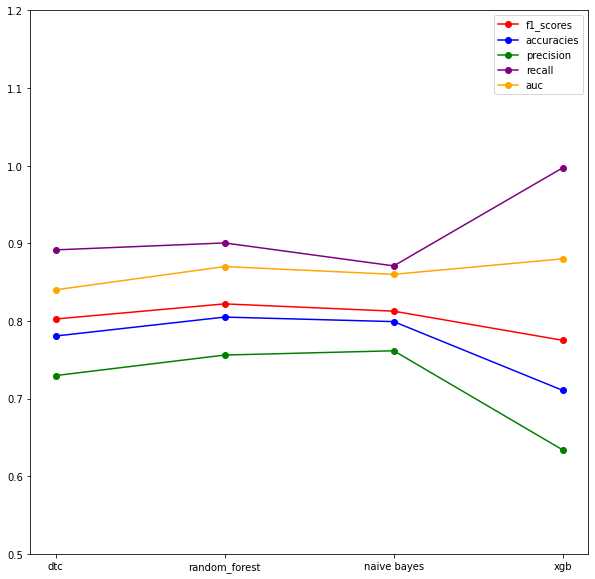

In [ ]:
x = ['dtc','random_forest','naive bayes','xgb']
from sklearn.metrics import accuracy_score as ac
from sklearn.metrics import precision_score as ps
from sklearn.metrics import recall_score as rs

y1 = [f1_score(y_test, y_pred1),f1_score(y_test, y_pred2),f1_score(y_test, y_pred3),f1_score(y_test, y_pred4)]
y2 = [ac(y_test, y_pred1),ac(y_test, y_pred2),ac(y_test, y_pred3),ac(y_test, y_pred4)]
y3 = [ps(y_test, y_pred1),ps(y_test, y_pred2),ps(y_test, y_pred3),ps(y_test, y_pred4)]
y4 = [rs(y_test, y_pred1),rs(y_test, y_pred2),rs(y_test, y_pred3),rs(y_test, y_pred4)]
y5 = [0.84, 0.87, 0.86, 0.88]

plt.plot(x,y1,color = 'red', marker = 'o', label = 'f1_scores')
plt.plot(x, y2, color = 'blue', marker = 'o', label = 'accuracies')
plt.plot(x, y3, color = 'green', marker = 'o', label = 'precision')
plt.plot(x, y4, color = 'purple', marker = 'o', label = 'recall')
plt.plot(x, y5, color = 'orange', marker = 'o', label = 'auc')

plt.legend(loc = "best")
plt.ylim(0.5,1.2)

from matplotlib.pyplot import figure
plt.rcParams['figure.figsize'] = [10,10]

plt.show()

SFFS FOR RANDOM FOREST CLASSIFIER

In [ ]:
import joblib
import sys
sys.modules['sklearn.externals.joblib'] = joblib
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
sfs = SFS(clf2,k_features = 10,forward = True, floating = True, verbose = 2, scoring = 'f1', cv = 4)
sfs = sfs.fit(x_train, y_train)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  1.6min finished

[2022-05-02 15:42:26] Features: 1/10 -- score: 0.9363028828374542[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    9.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:  1.6min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.3s finished

[2022-05-02 15:44:05] Features: 2/10 -- score: 0.9366051962528106[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    9.2s remaining:    0.0s
[Parallel(n_jo

In [ ]:
import joblib
import sys
sys.modules['sklearn.externals.joblib'] = joblib
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
sfs = SFS(xg,k_features = 10,forward = True, floating = True, verbose = 2, scoring = 'f1', cv = 4)
sfs = sfs.fit(x_train, y_train)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  1.7min finished

[2022-05-02 16:48:43] Features: 1/10 -- score: 0.934954894032718[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   12.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:  2.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.2s finished

[2022-05-02 16:50:55] Features: 2/10 -- score: 0.9552750070558053[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   16.3s remaining:    0.0s
[Parallel(n_job